# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Loading data with Pandas

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
100% 66.0M/66.0M [00:00<00:00, 164MB/s]
100% 66.0M/66.0M [00:00<00:00, 161MB/s]


In [4]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [5]:
credit_card_data = pd.read_csv('creditcard.csv')

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Statistics

In [8]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This Dataset is highly unbalanced

0 -> Normal tranaction

1 -> Fraudulent tranaction

In [11]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [14]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [15]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions.

Number of Fraudulent Transactions --> 492

In [16]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162708,115310.0,2.096972,-1.113885,-0.943164,-1.219276,-0.418802,0.478101,-1.017425,0.118131,-0.217694,...,-0.026707,-0.216824,0.230520,-0.306953,-0.371278,-0.482809,-0.003192,-0.043069,63.00,0
231815,146939.0,1.397272,-1.818984,-1.337033,-2.175127,-0.331404,0.798931,-0.432757,0.291453,2.216698,...,0.153432,0.113058,0.047949,-1.637704,-0.525542,-1.034402,0.069769,-0.007622,290.04,0
249573,154472.0,-1.027807,1.303602,0.543079,1.268049,-0.850369,-0.038411,-0.235553,0.951155,0.307617,...,-0.322243,-1.065147,0.296577,-0.141629,-0.875238,-1.017706,-0.246745,0.067957,28.99,0
131497,79624.0,0.421204,-0.832689,-0.273080,1.480499,-0.501297,-0.793235,0.924280,-0.248208,-0.563268,...,-0.028322,-1.074805,-0.244817,0.487919,0.279433,-0.717544,-0.086658,0.080866,405.70,0
213813,139402.0,-0.817753,1.222133,-1.529628,1.007640,0.848381,0.232386,1.746882,0.316087,-1.248139,...,0.217921,0.407668,0.207454,0.087570,0.196183,-0.402746,0.250453,0.222342,223.99,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


Splitting the data into Features & Targets

In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
162708  115310.0  2.096972 -1.113885 -0.943164 -1.219276 -0.418802  0.478101   
231815  146939.0  1.397272 -1.818984 -1.337033 -2.175127 -0.331404  0.798931   
249573  154472.0 -1.027807  1.303602  0.543079  1.268049 -0.850369 -0.038411   
131497   79624.0  0.421204 -0.832689 -0.273080  1.480499 -0.501297 -0.793235   
213813  139402.0 -0.817753  1.222133 -1.529628  1.007640  0.848381  0.232386   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(Y)

162708    0
231815    0
249573    0
131497    0
213813    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Data Visualization

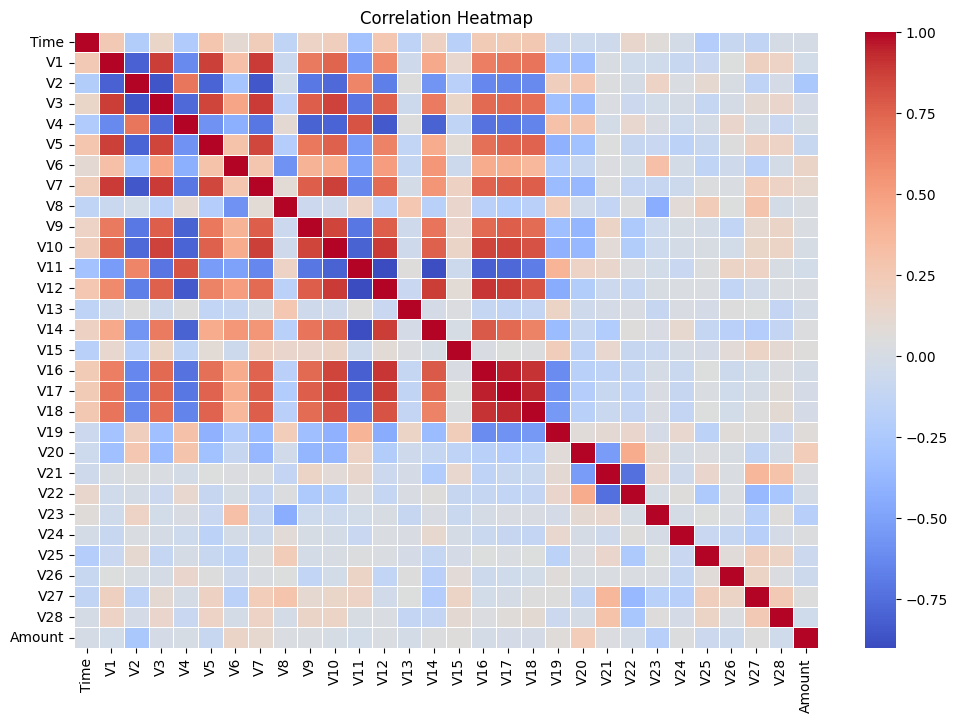

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

This heatmap visualizes the correlation matrix of the features in dataset

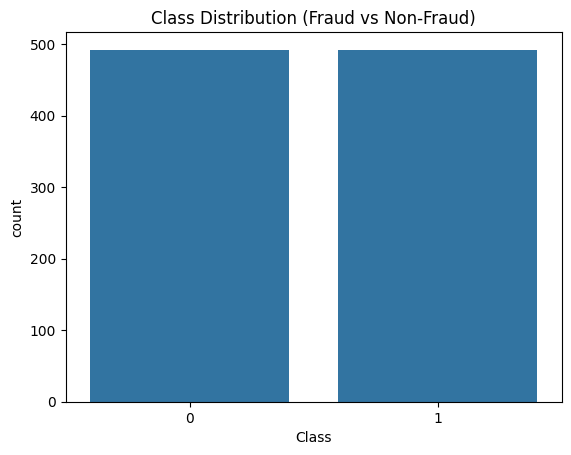

In [25]:
sns.countplot(x=Y)  # Assuming 'y' is your target variable
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

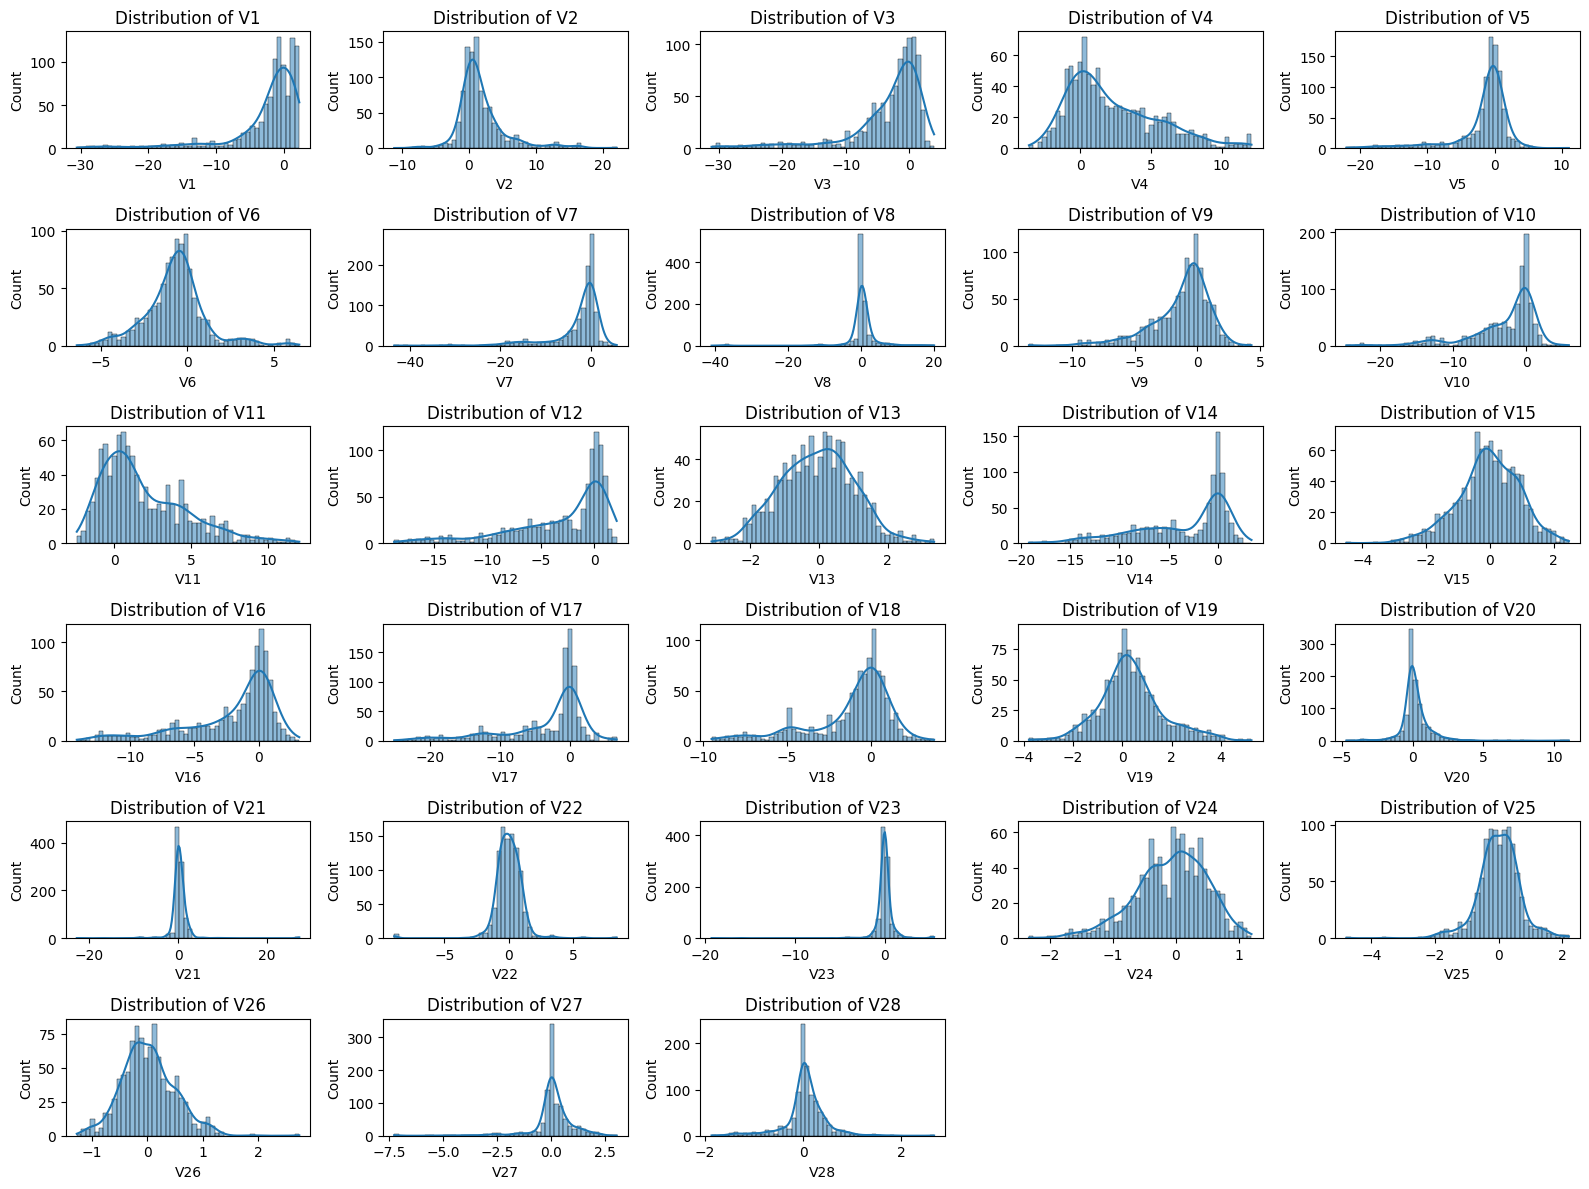

In [26]:
# List of all feature columns to plot (assuming V1 to V28 and Amount are your features)
feature_columns = [col for col in X.columns if col.startswith('V')]  # You can also include 'Amount'

# Plot the distribution of each feature
plt.figure(figsize=(16, 12))  # Adjust the size as needed

for i, col in enumerate(feature_columns, 1):
    plt.subplot(6, 5, i)  # Creates a grid with 6 rows and 5 columns
    sns.histplot(X[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()  # Adjusts the spacing between plots
plt.show()

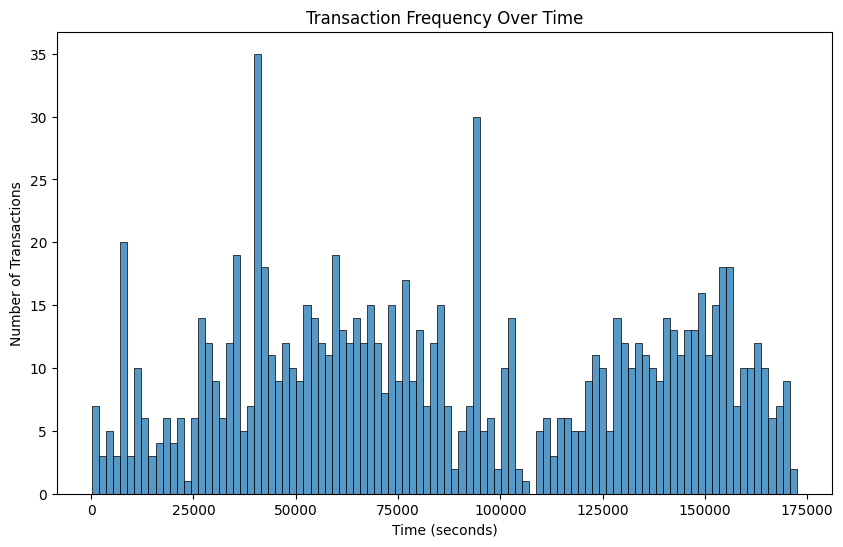

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(X['Time'], bins=100, kde=False)
plt.title("Transaction Frequency Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Transactions")
plt.show()

Split the data into Training data & Testing Data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape,x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [30]:
model = LogisticRegression()

In [31]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06
1090,840.0,-1.089781,1.367350,1.413675,0.190288,0.048179,-0.179594,0.485459,0.153446,-0.490347,...,0.250654,-0.165351,-0.409267,0.014498,0.171924,-0.306039,0.171995,0.168192,0.235689,8.99
82907,59604.0,0.760298,-0.526672,1.712227,3.066401,-1.266614,0.803418,-0.795057,0.460575,0.807826,...,-0.054251,-0.000410,-0.031569,-0.031212,0.373413,0.156737,0.035425,0.042850,0.055671,137.71
84703,60426.0,0.550221,-0.399114,-0.267267,1.477326,-0.120851,-0.131585,0.423485,-0.012989,-0.448935,...,0.534672,0.127009,-0.253321,-0.275516,-0.078664,0.313903,-0.469665,-0.001158,0.094806,304.75
252767,155962.0,-3.364602,3.097260,-2.677201,-0.818024,-1.417345,-0.929167,-1.255642,2.518712,-0.305120,...,-0.029785,-0.122002,-0.714363,0.308794,-0.507712,-0.068568,0.169610,-0.110563,-0.001499,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114446,73486.0,1.142933,-0.728896,0.452677,-1.396430,-0.905952,-0.386733,-0.441785,-0.106433,1.753533,...,0.231799,0.000892,0.101482,-0.222183,-0.360089,0.488680,0.009962,0.035949,0.037378,100.00
236140,148682.0,-0.820289,0.313442,2.204271,-0.844516,0.543323,0.293849,0.338539,0.085574,0.184771,...,0.114148,0.268287,0.953691,-0.525829,0.808177,0.733417,-0.117087,-0.112425,-0.157980,8.32
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,...,0.474414,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1.00
43061,41353.0,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,-0.995787,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12


Model Evaluation

In [33]:
# accuracy on training data
x_train_prediction = model.predict(x_train)

In [35]:
print(x_train_prediction)

[0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 

In [36]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9479034307496823


In [37]:
#check accuracy of test data
x_test_prediction = model.predict(x_test)

In [38]:
print(x_test_prediction)

[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [65]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.934010152284264


# Building a Predictive System

In [40]:
input_data=(180.000000,-0.782666,1.017987,1.505851,0.920905,0.758765,0.392475,1.357625,-0.666453,1.071130,1.702692,-0.812493,-0.914155,-1.234178,-0.856786,0.551041,-1.402290,0.060432,-0.547990,0.858789,0.663807,-0.410457,0.145970,-0.248113,-0.452121,0.014228,-0.281961,0.118371,-0.508471,23.630000)
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('Legit')
else:
  print('Fraud')

[0]
Legit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [66]:
!pip install pyngrok

In [67]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken

ngrok.set_auth_token("#Enter auth token")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])
#Retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://219e-34-86-115-2.ngrok-free.app" -> "http://localhost:5000"


In [68]:
html_content = """
         HTML Code which is write on form.html
"""

# Save the HTML to a file
with open("form.html", "w") as file:
    file.write(html_content)


In [ ]:
from flask import Flask, request, jsonify, send_from_directory
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    return send_from_directory('', 'form.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    Time = request.form['Time']
    V1 = request.form['V1']
    V2 = request.form['V2']
    V3 = request.form['V3']
    V4 = request.form['V4']
    V5 = request.form['V5']
    V6 = request.form['V6']
    V7 = request.form['V7']
    V8 = request.form['V8']
    V9 = request.form['V9']
    V10 = request.form['V10']
    V11 = request.form['V11']
    V12 = request.form['V12']
    V13 = request.form['V13']
    V14 = request.form['V14']
    V15 = request.form['V15']
    V16 = request.form['V16']
    V17 = request.form['V17']
    V18 = request.form['V18']
    V19 = request.form['V19']
    V20 = request.form['V20']
    V21 = request.form['V21']
    V22 = request.form['V22']
    V23 = request.form['V23']
    V24 = request.form['V24']
    V25 = request.form['V25']
    V26 = request.form['V26']
    V27 = request.form['V27']
    V28 = request.form['V28']
    Amount = request.form['Amount']

    # Convert data to appropriate types
    Time = float(Time)
    V1 = float(V1)
    V2 = float(V2)
    V3 = float(V3)
    V4 = float(V4)
    V5 = float(V5)
    V6 = float(V6)
    V7 = float(V7)
    V8 = float(V8)
    V9 = float(V9)
    V10 = float(V10)
    V11 = float(V11)
    V12 = float(V12)
    V13 = float(V13)
    V14 = float(V14)
    V15 = float(V15)
    V16 = float(V16)
    V17 = float(V17)
    V18 = float(V18)
    V19 = float(V19)
    V20 = float(V20)
    V21 = float(V21)
    V22 = float(V22)
    V23 = float(V23)
    V24 = float(V24)
    V25 = float(V25)
    V26 = float(V26)
    V27 = float(V27)
    V28 = float(V28)
    Amount = float(Amount)

    # Make prediction
    features = [[Time,	V1,	V2,	V3,	V4,	V5,	V6,	V7,	V8,	V9,	V10, V11, V12, V13, V14, V15, V16, V17, V18, V19,	V20,	V21,	V22,	V23,	V24,	V25,	V26,	V27,	V28,	Amount]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()



Public URL: NgrokTunnel: "https://52a0-34-86-115-2.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [25/Oct/2024 18:28:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Oct/2024 18:28:46] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [25/Oct/2024 18:29:33] "POST /predict HTTP/1.1" 200 -
